<a href="https://colab.research.google.com/github/gurnameh-99/GANs-Experiments/blob/main/AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

5


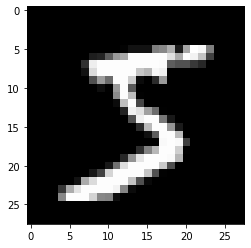

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

plt.imshow(x_train[0], cmap="gray")
print(y_train[0])

In [3]:
x_test[0].shape

(28, 28)

In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [7]:
encoder_input = keras.Input(shape=(28,28,1), name="img")
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")

decoder_input = keras.layers.Dense(784, activation="relu")(encoder_output)
decoder_output = keras.layers.Reshape((28,28,1))(decoder_input)

opt = keras.optimizers.Adam(learning_rate=0.001, decay= 1e-6)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [8]:
autoencoder.compile(opt, loss="mse")

In [9]:
autoencoder.fit(x_train, x_train, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0276 - val_loss: 0.0111
Epoch 2/3
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0108 - val_loss: 0.0103
Epoch 3/3
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0102 - val_loss: 0.0100


In [10]:
example = encoder.predict([x_test[0].reshape(-1, 28, 28, 1)])[0]
print(example)

[1.5760666  2.2792277  2.383087   0.         0.84908473 0.5471504
 1.8226566  1.2320254  1.0343809  0.60866326 0.7356601  1.758846
 1.517865   1.1873518  2.605779   1.5456684  1.2996173  2.15402
 1.7636116  0.3722086  1.5635698  0.22078404 0.84002554 0.26868248
 0.9774555  1.4921411  0.67686254 0.43602043 2.0730429  0.79437345
 0.90444684 1.328524   0.5147922  0.27484798 0.4461314  0.6294981
 1.7313437  0.5924667  0.887311   0.         0.35426098 1.149147
 0.2791897  0.         0.3970583  1.0453649  1.2445476  0.
 2.0344856  0.2126104  0.7799211  1.1852827  0.75827754 0.7787255
 0.63328135 2.6551943  0.99446213 0.6365818  1.7262303  0.
 1.7514737  3.0954933  1.647461   0.10083327]


In [11]:
example.shape

(64,)

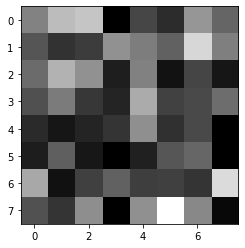

In [12]:
plt.imshow(example.reshape((8,8)), cmap="gray")

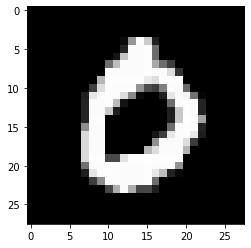

In [36]:
plt.imshow(x_test[3], cmap="gray")

In [37]:
ae_out = autoencoder.predict([x_test[3].reshape(-1,28,28,1)])[0]
print(ae_out.shape)

(28, 28, 1)


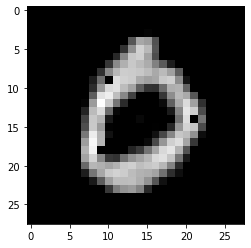

In [38]:
plt.imshow(ae_out.reshape(28,28), cmap="gray")

In [33]:
import random


def add_noise(img, random_chance=5):
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random.choice(range(100)) <= random_chance: 
                new_val = random.uniform(0, 1)
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

In [49]:
noisy = add_noise(x_train[0])

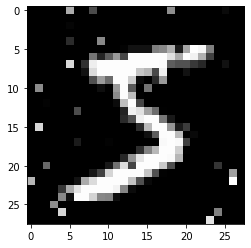

In [50]:
plt.imshow(noisy, cmap="gray")

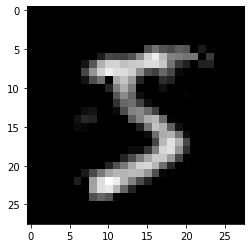

In [51]:
ae_out = autoencoder.predict([ noisy.reshape(-1, 28, 28, 1) ])
img = ae_out[0].reshape(28,28)  # predict is done on a vector, and returns a vector, even if its just 1 element, so we still need to grab the 0th
plt.imshow(img, cmap="gray")

In [52]:
def remove_values(img, random_chance=5):
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random.choice(range(100)) <= random_chance: 
                new_val = 0  # changing this to be 0 
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

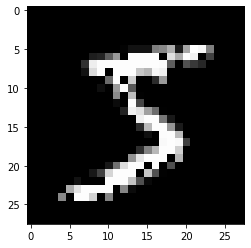

In [53]:
some_hidden = remove_values(x_train[0], random_chance=15)  # slightly higher chance so we see more impact
plt.imshow(some_hidden, cmap="gray")

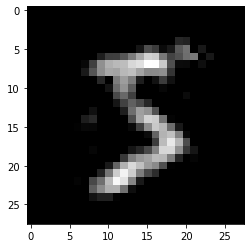

In [55]:
ae_out = autoencoder.predict([ some_hidden.reshape(-1, 28, 28, 1) ])
img = ae_out[0].reshape(28,28)  # predict is done on a vector, and returns a vector, even if its just 1 element, so we still need to grab the 0th
plt.imshow(img, cmap="gray")

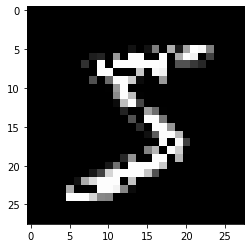

In [56]:
some_hidden = remove_values(x_train[0], random_chance=35)  # slightly higher chance so we see more impact
plt.imshow(some_hidden, cmap="gray")

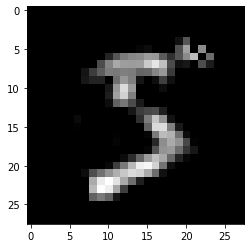

In [58]:
ae_out = autoencoder.predict([ some_hidden.reshape(-1, 28, 28, 1) ])
img = ae_out[0].reshape(28,28)  # predict is done on a vector, and returns a vector, even if its just 1 element, so we still need to grab the 0th
plt.imshow(img, cmap="gray")